This kernal is part for training and implementation of RCNN object detection algorithm. 

Whole RCNN implementation code is in [Github](https://github.com/ravirajsinh45/implementation_of_RCNN)

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import keras
import os
from tqdm import tqdm
import json
import warnings
warnings.filterwarnings('ignore')

In [35]:
train_json = 'train.json'
test_json = 'test.json'
images_path = 'Data/agri_data'

In [36]:
with open(train_json,'r') as train:
    train_data = json.load(train)

In [37]:
with open(test_json,'r') as test:
    test_data = json.load(test)

In [38]:
train_images_list = list(train_data.keys())
test_images_list =list(test_data.keys())

# Creating folders

In [43]:
os.mkdir('Trainnn')
os.mkdir('Testtt')

In [44]:
os.mkdir('Trainnn/weed')
os.mkdir('Trainnn/crop')
os.mkdir('Trainnn/background')

os.mkdir('Testtt/weed')
os.mkdir('Testtt/crop')
os.mkdir('Testtt/background')

# Generating images

In [17]:
#For Training
for count,img_id in tqdm(enumerate(train_images_list)):
    img = cv2.imread(images_path + img_id)
    
    
    for proposal in train_data[img_id]['region_proposal']:
        x,y,w,h = proposal[0]
        label   = proposal[1]
         
        temp_img = cv2.cvtColor(cv2.resize(img[y:y+h,x:x+w,:],(224,224)),cv2.COLOR_BGR2RGB)
        
        cv2.imwrite('Train/'+label+'/'+ label+'_'+ str(len(os.listdir('Train/'+label))) +'.jpeg',temp_img)
        
    
    for background in train_data[img_id]['negative_example']:
        x,y,w,h = background
        label = 'background'
        
        temp_img = cv2.cvtColor(cv2.resize(img[y:y+h,x:x+w,:],(224,224)),cv2.COLOR_BGR2RGB)
        
        cv2.imwrite('Train/'+label+'/'+ label+'_'+ str(len(os.listdir('Train/'+label))) + '.jpeg',temp_img)

2it [00:00, 4002.20it/s]

Image agri_0_1009.jpeg could not be loaded. Skipping.
Image agri_0_1017.jpeg could not be loaded. Skipping.


In [45]:
#For Testing
Trainnn = 'train.json'
images_path = os.path.join('DATA\agri_data')
for count,img_id in tqdm(enumerate(test_images_list)):
    img = cv2.imread(images_path + img_id)
    
    
    for proposal in test_data[img_id]['region_proposal']:
        x,y,w,h = proposal[0]
        label   = proposal[1]
         
        temp_img = cv2.cvtColor(cv2.resize(img[y:y+h,x:x+w,:],(224,224)),cv2.COLOR_BGR2RGB)
        
        cv2.imwrite('Testtt/'+label+'/'+ label+'_'+ str(len(os.listdir('Testtt/'+label))) +'.jpeg',temp_img)
        
    
    for background in test_data[img_id]['negative_example']:
        x,y,w,h = background
        label = 'background'
        
        temp_img = cv2.cvtColor(cv2.resize(img[y:y+h,x:x+w,:],(224,224)),cv2.COLOR_BGR2RGB)
        
        cv2.imwrite('Testtt/'+label+'/'+ label+'_'+ str(len(os.listdir('Testtt/'+label))) + '.jpeg',temp_img)


In [29]:
print('Total training weed images are {}'.format(len(os.listdir('Trainnn/weed'))))
print('Total training crop images are {}'.format(len(os.listdir('Trainnn/crop'))))
print('Total training background images are {}'.format(len(os.listdir('Trainnn/background'))))

Total training weed images are 0
Total training crop images are 0
Total training background images are 0


In [32]:
#For Training
for count,img_id in tqdm(enumerate(train_images_list)):
    img = cv2.imread(images_path + img_id)
    
    
    for proposal in train_data[img_id]['region_proposal']:
        x,y,w,h = proposal[0]
        label   = proposal[1]
         
        temp_img = cv2.cvtColor(cv2.resize(img[y:y+h,x:x+w,:],(224,224)),cv2.COLOR_BGR2RGB)
        
        cv2.imwrite('Train/'+label+'/'+ label+'_'+ str(len(os.listdir('Train/'+label))) +'.jpeg',temp_img)
        
    
    for background in train_data[img_id]['negative_example']:
        x,y,w,h = background
        label = 'background'
        
        temp_img = cv2.cvtColor(cv2.resize(img[y:y+h,x:x+w,:],(224,224)),cv2.COLOR_BGR2RGB)
        cv2.imwrite('Train/'+label+'/'+ label+'_'+ str(len(os.listdir('Train/'+label))) + '.jpeg',temp_img)

2it [00:00,  6.86it/s]


In [33]:
print('Total testing weed images are {}'.format(len(os.listdir('Test/weed'))))
print('Total testing crop images are {}'.format(len(os.listdir('Test/crop'))))
print('Total testing background images are {}'.format(len(os.listdir('Test/background'))))

Total testing weed images are 0
Total testing crop images are 0
Total testing background images are 0


# Visualizing Images

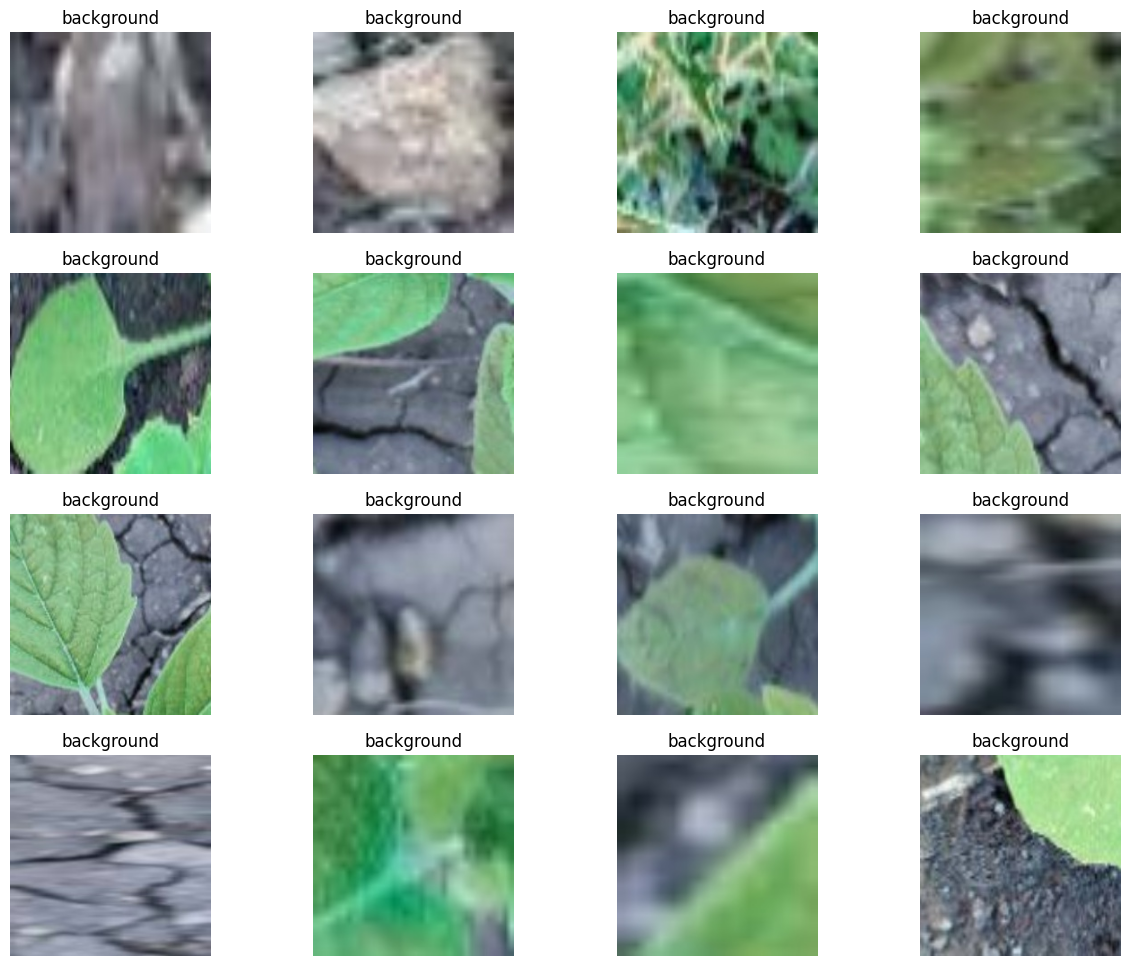

In [57]:
plt.figure(figsize=(15,12))
for i,img in enumerate(os.listdir('Data/Train/background')[:16]):
    plt.subplot(4,4,i+1)
    plt.title('background')
    img = cv2.imread('Data/Train/background/'+img)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')

plt.show()  

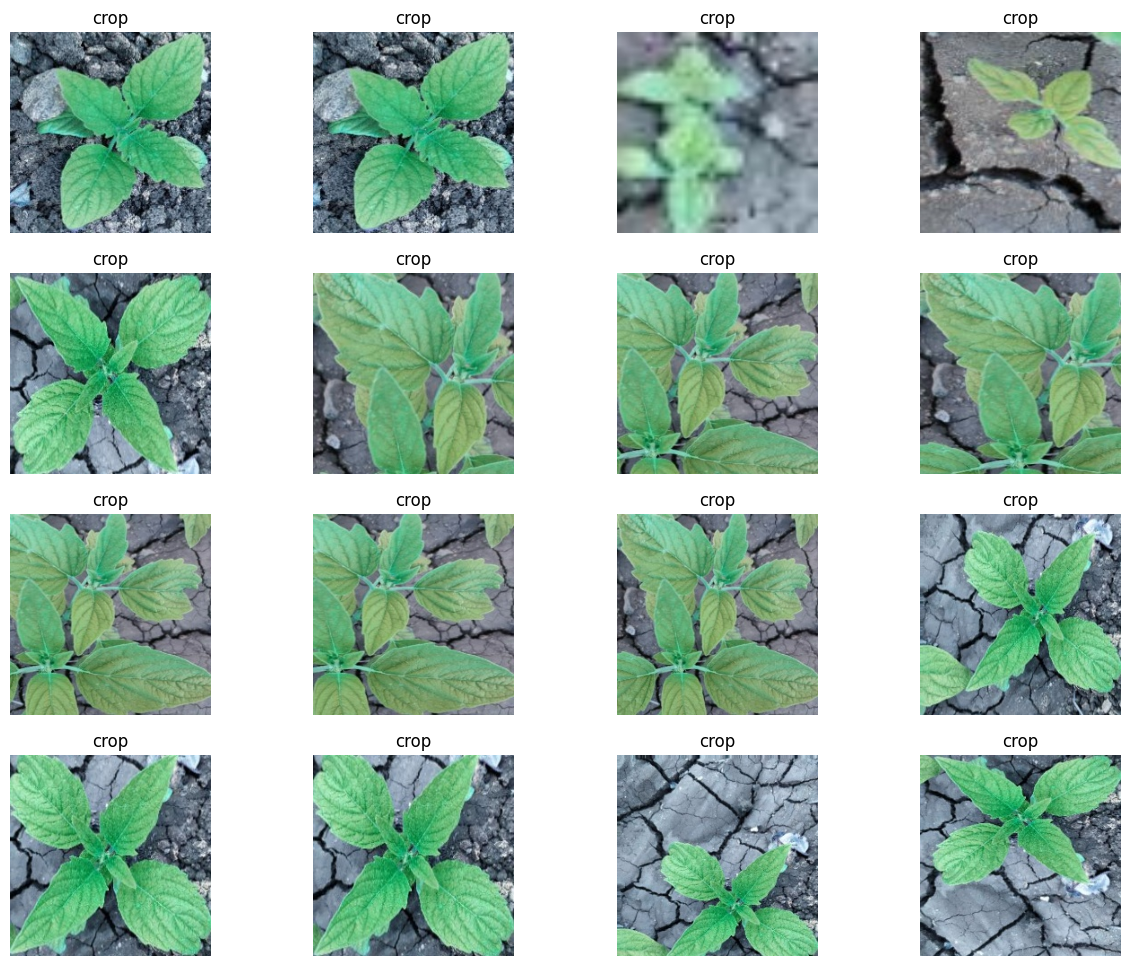

In [56]:
plt.figure(figsize=(15,12))
for i,img in enumerate(os.listdir('Data/Train/crop')[0:16]):
    plt.subplot(4,4,i+1)
    plt.title('crop')
    img = cv2.imread('Data/Train/crop/'+img)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')

plt.show()

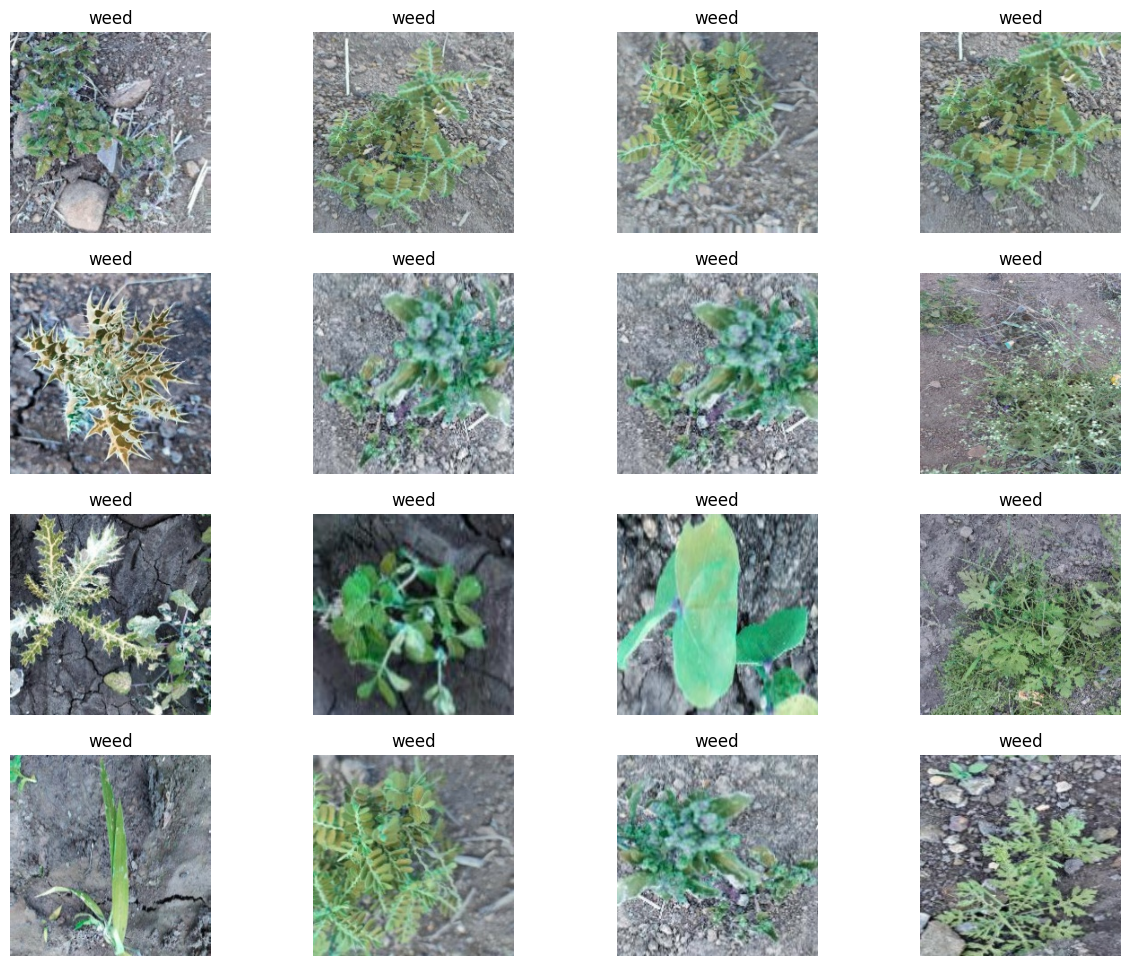

In [69]:
plt.figure(figsize=(15,12))

for i,img in enumerate(os.listdir('Data/Train/weeddd')[0:16]):
    plt.subplot(4,4,i+1)
    plt.title('weed')
    img = cv2.imread('Data/Train/weeddd/'+img)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
plt.show()